In [3]:
%matplotlib inline
from pathlib import Path
from cartopy import crs as ccrs
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import astropy.constants as astro
import xarray as xr
import netCDF4 as nc
import pandas as pd
import numpy as np
import scipy as sc
import os
import sys

def savefig(filename, directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
        plt.savefig(directory_path + filename, facecolor='white', bbox_inches='tight')
    else:
        plt.savefig(directory_path + filename, facecolor='white', bbox_inches='tight')

In [9]:
ocean_type = 'atlantic'
dpp        = 'ngc2009'
year       = '2020'
months     = '05'

days = 'all'
print(days)

lower_heightlevel, upper_heightlevel = ['70', '90']

degrees_lower_box_bound, degrees_upper_box_bound, degrees_left_box_bound, degrees_right_box_bound = (-5, 0, -30, -20)

selected_indices     = xr.open_dataset(f"/home/m/m300868/work_cathy/00_DATA/grid_info/selected_indices/selected_indices_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}.nc")
new_grid             = xr.open_dataset(f"/home/m/m300868/work_cathy/00_DATA/grid_info/new_grids/new_grid_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}.nc")
selected_oce_indices = xr.open_dataset(f"/home/m/m300868/work_cathy/00_DATA/grid_info/selected_indices/selected_oce_indices_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}.nc")
new_oce_grid         = xr.open_dataset(f"/home/m/m300868/work_cathy/00_DATA/grid_info/new_grids/new_oce_grid_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}.nc")
#vertical_grid    = xr.open_dataset(f"/home/m/m300868/work_cathy/00_DATA/grid_info/vertical_info/vertical_info_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}.nc", engine='netcdf4')

all


## Get WIND

In [10]:
variable = 'ua'
filename = f"/home/m/m300868/work_cathy/00_DATA/{dpp}/{variable}/{year}/{variable}_{dpp}_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}_year_{year}_month_{months}_days_{days}.nc"
print(filename)

/home/m/m300868/work_cathy/00_DATA/ngc2009/ua/2020/ua_ngc2009_-5_0_-30_-20_year_2020_month_05_days_all.nc


In [11]:
uu_profile = xr.open_dataset(filename)
uu_sfc     = (uu_profile.ua.sel(height=90))[valid][mask]
uu_ABL     = (uu_profile.ua.sel(height=90-top_of_ABL))[valid][mask]
uu_ABL_mean = ((uu_profile.ua.sel(height=slice(90-top_of_ABL,90)))[:,valid][:,mask]).mean(dim='height')
uu_tropo   = (uu_profile.ua.sel(height=90-top_of_ABL+1))[valid][mask]
uu_tropo

FileNotFoundError: [Errno 2] No such file or directory: b'/home/m/m300868/work_cathy/00_DATA/ngc2009/ua/2020/ua_ngc2009_-5_0_-30_-20_year_2020_month_05_days_all.nc'

In [27]:
variable = 'va'
filename = f"/home/m/m300868/work_cathy/00_DATA/{dpp}/{variable}/{year}/{variable}_{dpp}_{degrees_lower_box_bound}_{degrees_upper_box_bound}_{degrees_left_box_bound}_{degrees_right_box_bound}_year_{year}_month_{months}_days_{days}.nc"
print(filename)

/home/m/m300868/work_cathy/00_DATA/ngc2009/va/2020/va_ngc2009_-5_5_-40_10_year_2020_month_05_days_01_02_03_04_05_06_07_08_09_10_11_12_13_14_15_16_17_18_19_20_21_22_23_24_25_26_27_28_29_30_31.nc


In [28]:
vv_profile = xr.open_dataset(filename)
vv_sfc     = (vv_profile.va.sel(height=90))[valid][mask]
vv_ABL     = (vv_profile.va.sel(height=90-top_of_ABL))[valid][mask]
vv_ABL_mean = ((vv_profile.va.sel(height=slice(90-top_of_ABL,90)))[:,valid][:,mask]).mean(dim='height')
vv_tropo   = (vv_profile.va.sel(height=90-top_of_ABL+1))[valid][mask]
vv_sfc

<xarray.DataArray 'va' (cell: 241203)>
[241203 values with dtype=float32]
Coordinates:
    clon     (cell) float64 ...
    clat     (cell) float64 ...
    height   float64 90.0
  * cell     (cell) int64 8405032 8405034 8405064 ... 12484605 12484606 12484607

## Meridional Mean of Meridional Wind

### Surface

In [29]:
merid_BINS = 100

counts_per_bin_vv_sfc, lon_bins_vv_sfc = np.histogram(new_grid.clon[valid][mask], bins=merid_BINS)

varsum_per_bin_vv_sfc, _ = np.histogram(new_grid.clon[valid][mask], weights=vv_sfc, bins=lon_bins_vv_sfc)

meridional_mean_vv_sfc = varsum_per_bin_vv_sfc / counts_per_bin_vv_sfc

2.515149047709697


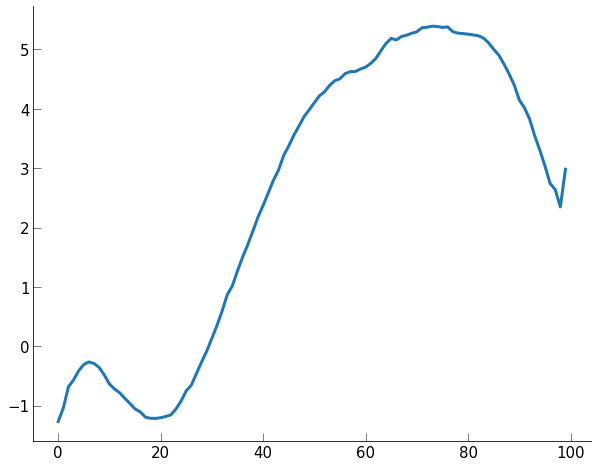

In [30]:
plt.plot(np.arange(merid_BINS), meridional_mean_vv_sfc)
print(np.mean(meridional_mean_vv_sfc))